## Load and Dimensionally Reduce data using Classical Multiview Multidimensional Scaling (MVMDS)

In [1]:
from multiview.datasets.base import load_UCImultifeature
from multiview.embed.mvmds import MVMDS
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
%matplotlib inline


### Load Data

In [2]:
# Load full dataset, labels not needed
data = load_UCImultifeature()

Xs = data[0]
y = data[1]

In [3]:
# Check data
print(f'There are {len(Xs)} views.')
print(f'There are {Xs[0].shape[0]} observations')
print(f'The feature sizes are: {[X.shape[1] for X in Xs]}')

There are 6 views.
There are 2000 observations
The feature sizes are: [76, 216, 64, 240, 47, 6]


### MVMDS Views Without Noise

In [5]:
# Create MVMDS object and create lower components
#mvmds = MVMDS(n_components = 6)
#Components = mvmds.fit(Xs,6)

TypeError: __init__() got an unexpected keyword argument 'n_components'

No handles with labels found to put in legend.


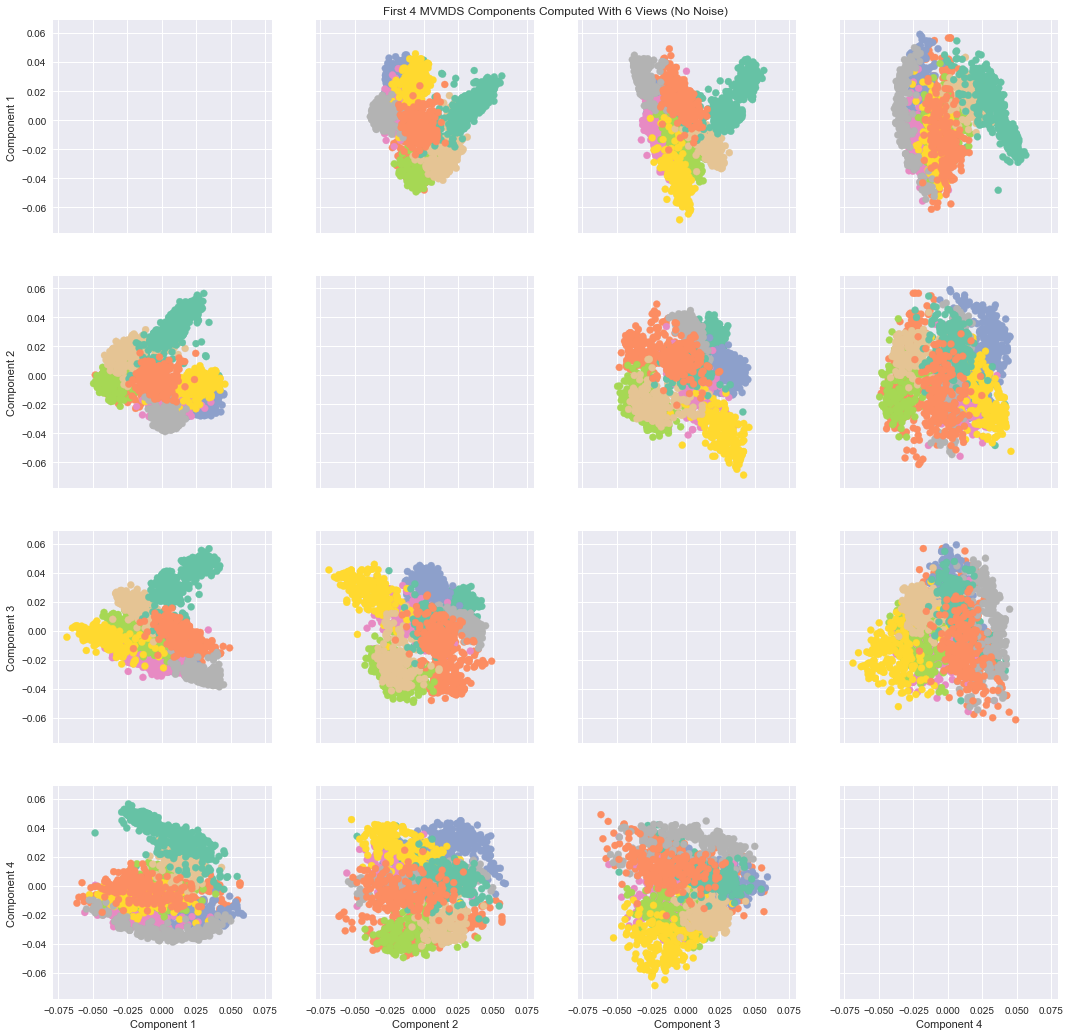

In [39]:
# Plot MVMDS images

plt.style.use('seaborn')

color_map = [sns.color_palette("Set2", 10)[int(i)] for i in y]

fig, axes = plt.subplots(4, 4, figsize = (18,18), sharey=True, sharex=True)

for i in range(4):
    for j in range(4):
        if i != j:
            axes[i,j].scatter(x = Components[:, i], y = Components[:, j], alpha = 1, label = y, color = color_map)
        axes[3, j].set_xlabel(f'Component {j+1}')
    axes[i,0].set_ylabel(f'Component {i+1}')


ax = fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
ax.grid(False)
ax.set_title('First 4 MVMDS Components Computed With 6 Views (No Noise)')
ax.set_label("MyLabel")
ax.legend()
    


Text(0.5, 1.0, 'First 4 PCA Components Computed With 1 View')

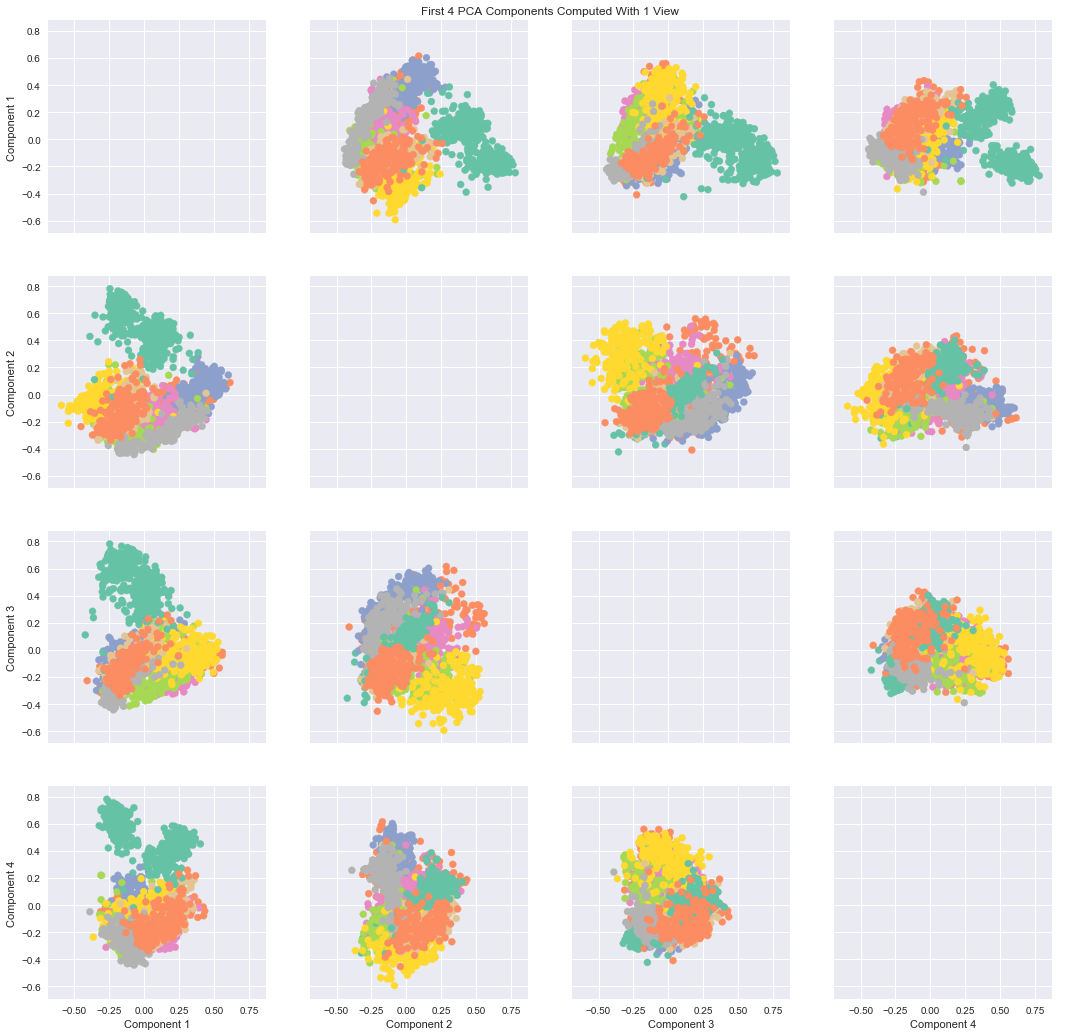

In [25]:
#PCA Plots

pca = PCA(n_components=6)
pca_Components = pca.fit_transform(Xs[0])

fig, axes = plt.subplots(4, 4, figsize = (18,18), sharey=True, sharex=True)

for i in range(4):
    for j in range(4):
        if i != j:
            axes[i,j].scatter(x = pca_Components[:, i], y = pca_Components[:, j], alpha = 1, label = y, color = color_map)
        axes[3, j].set_xlabel(f'Component {j+1}')
    axes[i,0].set_ylabel(f'Component {i+1}')

ax = fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
ax.grid(False)
ax.set_title('First 4 PCA Components Computed With 1 View')


### MVMS Views With Noise

In [28]:
# Create view with 5 views of UCI digits data and 1 view of noise

Noisy_View = np.random.rand(Xs[0].shape[0], Xs[0].shape[1])
Noisy_Xs = [Xs[0], Xs[1], Xs[2], Xs[3], Xs[4], Noisy_View]

mvmds = MVMDS()
Noisy_Components = mvmds.fit(Noisy_Xs,6)

Text(0.5, 1.0, 'First 4 MVMDS Components Computed With 6 Views (Noise)')

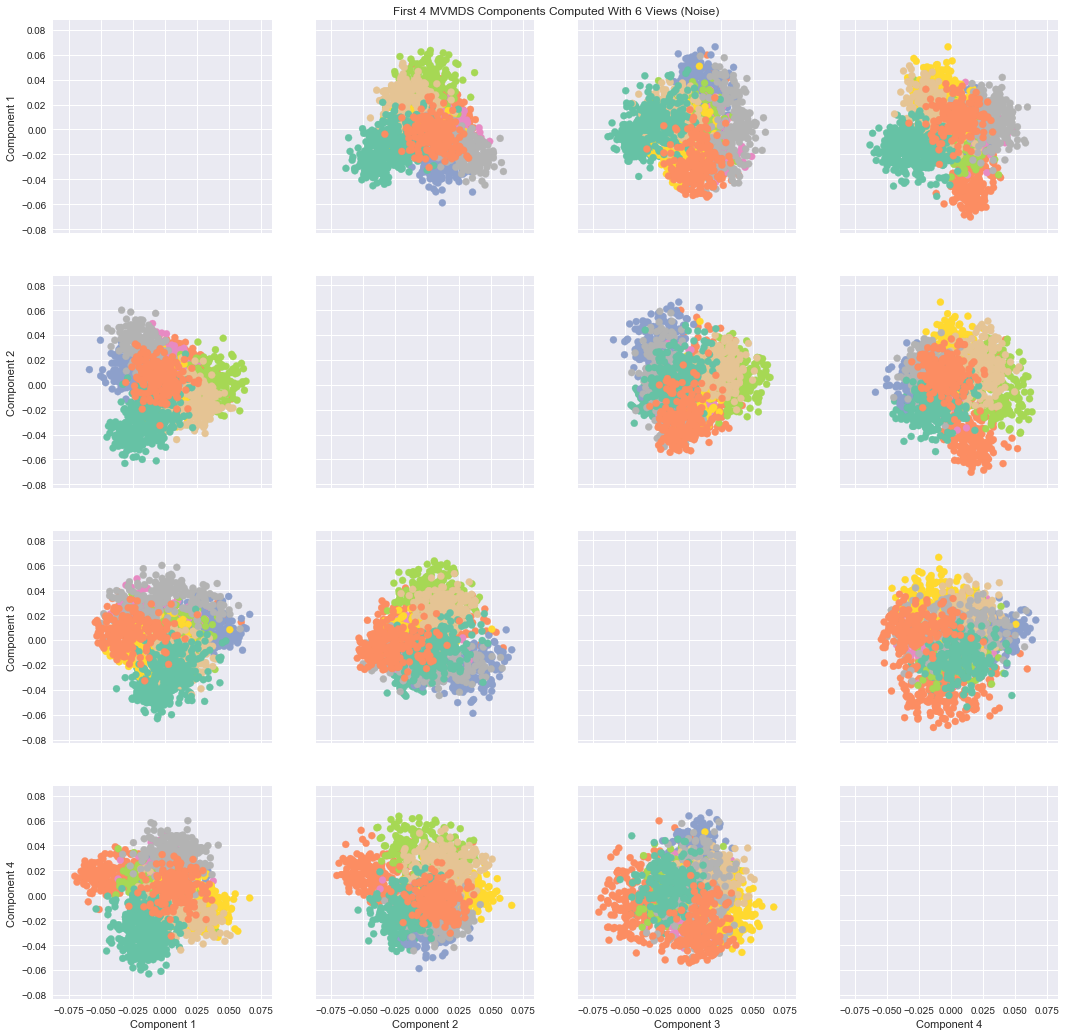

In [29]:
# Plot noisy MVMDS Images

plt.style.use('seaborn')

color_map = [sns.color_palette("Set2", 10)[int(i)] for i in y]

fig, axes = plt.subplots(4, 4, figsize = (18,18), sharey=True, sharex=True)

for i in range(4):
    for j in range(4):
        if i != j:
            axes[i,j].scatter(x = Noisy_Components[:, i], y = Noisy_Components[:, j], alpha = 1, label = y, color = color_map)
        axes[3, j].set_xlabel(f'Component {j+1}')
    axes[i,0].set_ylabel(f'Component {i+1}')

ax = fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
ax.grid(False)
ax.set_title('First 4 MVMDS Components Computed With 6 Views (Noise)')
